# 머신러닝 실습
## 09:00 ~ 10:50 (2시간) 동안 풀어보기

## 선박 정시 도착 예측 데이터

* ID: 고객의 ID 번호입니다.
* Warehouse_block: 회사는 A,B,C,D,E와 같은 블록으로 나누어진 큰 창고를 가지고 있습니다.
* Mode_of_Shipment: 회사는 선박, 항공, 육로 등 다양한 방법으로 제품을 배송합니다.
* Customer_care_calls	: 배송문의를 위한 문의 전화 횟수입니다.
* Customer_rating: 회사는 모든 고객으로부터 평가를 받았습니다. 1이 가장 낮음(Worst), 5가 가장 높음(Best)입니다.
* Cost_of_the_Product: 미국 달러로 표시된 제품 가격입니다.
* Prior_purchases: 사전 구매 횟수입니다.
* Product_importance: 회사는 낮음, 중간, 높음과 같은 다양한 매개변수로 제품을 분류했습니다.
* Gender: 남성과 여성.
* Discount_offered: 해당 특정 제품에 대해 할인이 제공됩니다.
* Weight_in_gms: 그램 단위의 무게입니다.
* Reached.on.Time_Y.N: 목표 변수이며, 1은 제품이 정시에 도착하지 않았음을 나타내고 0은 정시에 도달했음을 나타냅니다.

### 1. 데이터 불러와서 df에 저장하세요
* https://raw.githubusercontent.com/kim-juwan/data_folder/main/data/shipment_trn.csv

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kim-juwan/data_folder/main/data/shipment_trn.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3685,D,Road,4,3,258,2,low,F,2,4308,0
1,9822,F,Ship,4,2,151,3,medium,M,3,5154,1
2,4305,A,Ship,4,4,163,2,low,F,9,4720,0
3,10977,A,Flight,3,2,278,4,medium,M,9,1631,0
4,3916,B,Ship,3,4,250,3,low,M,10,5688,0


### 2. 모든 컬럼의 값과 dtype을 확인하시고 이상한 컬럼을 찾아 정상으로 수정하세요
* df.head()와 df.info() 또는 dtypes를 사용하여 확인
* 정수만 있는 컬럼 중 dtype이 이상한 컬럼이 있다
* apply를 사용하여 처리하세요

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8009 entries, 0 to 8008
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8009 non-null   int64 
 1   Warehouse_block      8009 non-null   object
 2   Mode_of_Shipment     8009 non-null   object
 3   Customer_care_calls  8009 non-null   int64 
 4   Customer_rating      8009 non-null   int64 
 5   Cost_of_the_Product  8009 non-null   int64 
 6   Prior_purchases      8009 non-null   int64 
 7   Product_importance   8009 non-null   object
 8   Gender               8009 non-null   object
 9   Discount_offered     8009 non-null   object
 10  Weight_in_gms        8009 non-null   int64 
 11  Reached.on.Time_Y.N  8009 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 751.0+ KB


In [2]:
df['Discount_offered'].unique()

array(['2', '3', '9', '10', '5', '20', '22', '6', '4', ' *7 ', '15', '19',
       '1', '18', '17', '28', '33', '21', '12', '13', '14', '31', '11',
       '26', '24', '29', '23', '32', '25', '27', '16', '30'], dtype=object)

In [3]:
df['Discount_offered'] = df['Discount_offered'].apply(lambda x : int(x.replace(' *7 ', '7')))

In [5]:
# df['Discount_offered'] = df['Discount_offered'].str.replace(' *7 ', '7').astype(int)

In [76]:
df['Discount_offered']

0        2
1        3
2        9
3        9
4       10
        ..
8004     1
8005     2
8006     5
8007     4
8008    29
Name: Discount_offered, Length: 8009, dtype: int64

### 3. ID 컬럼을 제거하여 df로 다시 저장하세요

In [4]:
df = df.drop('ID', axis = 1)

### 4. Reached.on.Time_Y.N 컬럼을 사용해서 파이 그래프를 그리세요.
* df['Reached.on.Time_Y.N'].value_counts() 사용하기
* plt.pie()
* autopct = '%.2f%%'로 소수점 둘째자리까지 표현

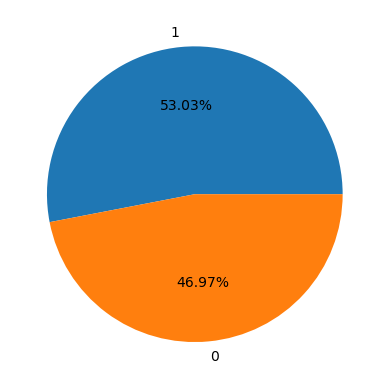

In [5]:
import matplotlib.pyplot as plt

y_cnt = df['Reached.on.Time_Y.N'].value_counts()
plt.pie(y_cnt.values, labels = y_cnt.index, autopct = '%.2f%%')
plt.show()

In [77]:
y_cnt

Reached.on.Time_Y.N
1    4247
0    3762
Name: count, dtype: int64

### 5. 컬럼 Reached.on.Time_Y.N에 따른 Weight_in_gms 컬럼 값이 차이가 있는지 확인하기 위해 barplot을 통해 그래프를 그리고 통계 검정을 하세요.

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

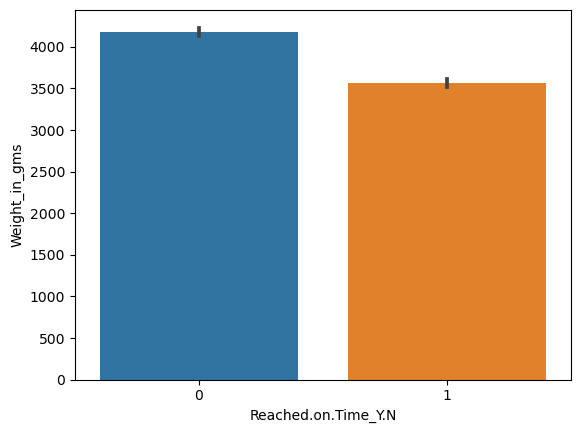

In [8]:
import seaborn as sns

sns.barplot(data = df, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms')

In [6]:
from scipy import stats

w0 = df[df['Reached.on.Time_Y.N'] == 0]['Weight_in_gms']
w1 = df[df['Reached.on.Time_Y.N'] == 1]['Weight_in_gms']

print(stats.shapiro(w0))
print(stats.shapiro(w1))

ShapiroResult(statistic=0.8161751627922058, pvalue=0.0)
ShapiroResult(statistic=0.9021150469779968, pvalue=0.0)


In [7]:
stats.mannwhitneyu(w0, w1)

MannwhitneyuResult(statistic=9718822.5, pvalue=5.275708624539275e-63)

### 6. 컬럼 Reached.on.Time_Y.N에 따른 Customer_care_calls 컬럼 값이 차이가 있는지 확인하기 위해 barplot을 통해 그래프를 그리고 통계 검정을 하세요.

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Customer_care_calls'>

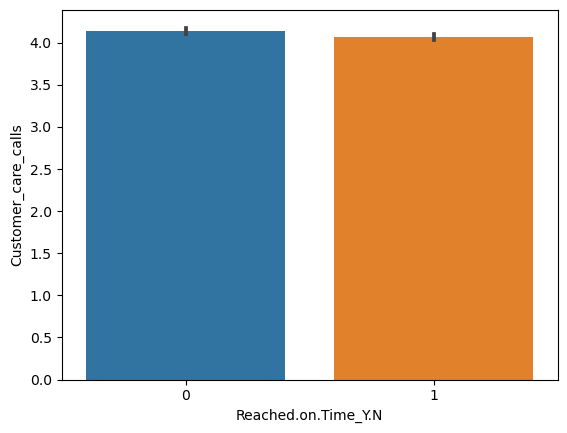

In [8]:
import seaborn as sns

sns.barplot(data = df, x = 'Reached.on.Time_Y.N', y = 'Customer_care_calls')

In [9]:
from scipy import stats

c0 = df[df['Reached.on.Time_Y.N'] == 0]['Customer_care_calls']
c1 = df[df['Reached.on.Time_Y.N'] == 1]['Customer_care_calls']

print(stats.shapiro(c0))
print(stats.shapiro(c1))

ShapiroResult(statistic=0.9203817844390869, pvalue=9.935766631448683e-41)
ShapiroResult(statistic=0.9179314374923706, pvalue=3.5032461608120427e-43)


In [10]:
stats.mannwhitneyu(c0, c1)

MannwhitneyuResult(statistic=8270764.0, pvalue=0.00466846385529496)

In [11]:
df['Customer_care_calls'].unique()

array([4, 3, 5, 6, 2, 7], dtype=int64)

In [12]:
c_df = pd.crosstab(df['Customer_care_calls'], df['Reached.on.Time_Y.N'])
c_df

Reached.on.Time_Y.N,0,1
Customer_care_calls,,
2,189,243
3,1020,1238
4,1236,1368
5,800,881
6,415,411
7,102,106


In [ ]:
sns.countplot(data = df, x = 'Customer_care_calls', hue='Reached.on.Time_Y.N')

In [14]:
stats.chi2_contingency(c_df)

Chi2ContingencyResult(statistic=9.150990143108872, pvalue=0.10319111893973698, dof=5, expected_freq=array([[ 202.91971532,  229.08028468],
       [1060.6312898 , 1197.3687102 ],
       [1223.15495068, 1380.84504932],
       [ 789.60194781,  891.39805219],
       [ 387.99001124,  438.00998876],
       [  97.70208515,  110.29791485]]))

### 7. 컬럼 Product_importance에 따른 종속변수 값이 차이가 있는지 확인하기 위해 countplot을 통해 그래프를 그리고 통계 검정을 하세요.
* x = 'Product_importance', hue = 'Reached.on.Time_Y.N'

In [ ]:
sns.countplot(data=df, x = 'Product_importance', hue = 'Reached.on.Time_Y.N')

In [16]:
c_df = pd.crosstab(df['Product_importance'], df['Reached.on.Time_Y.N'])
c_df

Reached.on.Time_Y.N,0,1
Product_importance,,
high,286,382
low,1819,2065
medium,1657,1800


In [17]:
stats.chi2_contingency(c_df)

Chi2ContingencyResult(statistic=5.944210674141519, pvalue=0.05119541319060439, dof=2, expected_freq=array([[ 313.77400425,  354.22599575],
       [1824.39855163, 2059.60144837],
       [1623.82744413, 1833.17255587]]))

### 8. df의 'Reached.on.Time_Y.N' 컬럼을 y에 저장하고 기존 df에서 컬럼을 제거하세요

In [18]:
y = df['Reached.on.Time_Y.N']
df = df.drop('Reached.on.Time_Y.N', axis = 1)

### 9. 'Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender' 컬럼을 df_str으로 추출하세요



In [19]:
df_str = df[['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender']]

### 10. 숫자형 컬럼을 df_num로 추출하세요

In [20]:
df_num = df.drop(['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender'], axis = 1)

### 11. df_str은 OneHotEncoder를 사용하여, df_num는 MinMaxScaler를 이용하여 전처리하세요
* df_str은 str_scaled에 저장
* df_num은 num_scaled에 저장

In [21]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

oh_enc = OneHotEncoder()
str_scaled = oh_enc.fit_transform(df_str)

mm_scaler = MinMaxScaler()
num_scaled = mm_scaler.fit_transform(df_num)

### 12. str_scaled, num_scaled를 데이터프레임으로 바꾼뒤 axis =1로 합치고 data에 저장하세요
* str_scaled는 toarray() 함수를 통해 넘파이 배열로 만들기

In [22]:
import numpy as np

data = np.concatenate([str_scaled.toarray(), num_scaled], axis = 1)
print(data.shape)

(8009, 23)


### 13. train_test_split을 사용하여 data는 X_train, X_test, y는 y_train, y_test로 나누세요
* 비율은 9:1
* random_state는 0

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.1, random_state=0)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7208, 23) (801, 23) (7208,) (801,)


### 14. GradientBoostMachine을 사용하여 gbm 모델을 생성하세요
* n_estimators = 200
* max_depth = 5
* learning_rate = 0.01
* random_state = 120

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, max_depth = 5, 
                                 learning_rate=0.01, random_state=120)

### 15. 학습 데이터를 사용해 gbm 모델을 학습하고 테스트 데이터로 예측한 결과를 pred에 저장하세요

In [26]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
                           random_state=120)

In [27]:
pred = gbm.predict(X_test)

In [28]:
pred_proba = gbm.predict_proba(X_test)

### 16. roc_auc_score를 사용하여 y_test와 pred를 평가하세요

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_proba[:, 1])

0.6605632040050062

### 17. 모델 성능 향상을 위해 다양한 방법을 시도하여보세요

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/kim-juwan/data_folder/main/data/shipment_trn.csv')
df['Discount_offered'] = df['Discount_offered'].apply(lambda x : int(x.replace(' *7 ', '7')))

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8009 entries, 0 to 8008
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8009 non-null   int64 
 1   Warehouse_block      8009 non-null   object
 2   Mode_of_Shipment     8009 non-null   object
 3   Customer_care_calls  8009 non-null   int64 
 4   Customer_rating      8009 non-null   int64 
 5   Cost_of_the_Product  8009 non-null   int64 
 6   Prior_purchases      8009 non-null   int64 
 7   Product_importance   8009 non-null   object
 8   Gender               8009 non-null   object
 9   Discount_offered     8009 non-null   int64 
 10  Weight_in_gms        8009 non-null   int64 
 11  Reached.on.Time_Y.N  8009 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 751.0+ KB


In [56]:
# 불필요한 컬럼 제거
obj_col = ['Warehouse_block', 'Mode_of_Shipment',  
           'Customer_rating', 'Product_importance', 'Gender']
num_col = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 
           'Discount_offered', 'Weight_in_gms']

In [57]:
a = df[df['Reached.on.Time_Y.N'] == 0]['Cost_of_the_Product']
b = df[df['Reached.on.Time_Y.N'] == 1]['Cost_of_the_Product']
print(stats.shapiro(a))
print(stats.shapiro(b))
print(stats.mannwhitneyu(a,b))

ShapiroResult(statistic=0.971718430519104, pvalue=1.2006831215269167e-26)
ShapiroResult(statistic=0.9702005386352539, pvalue=7.636365794421968e-29)
MannwhitneyuResult(statistic=8325869.0, pvalue=0.0010912525389018888)


In [58]:
a = df[df['Reached.on.Time_Y.N'] == 0]['Prior_purchases']
b = df[df['Reached.on.Time_Y.N'] == 1]['Prior_purchases']
print(stats.shapiro(a))
print(stats.shapiro(b))
print(stats.mannwhitneyu(a,b))

ShapiroResult(statistic=0.8383628129959106, pvalue=0.0)
ShapiroResult(statistic=0.8136800527572632, pvalue=0.0)
MannwhitneyuResult(statistic=8464341.0, pvalue=1.90481977395726e-06)


In [59]:
a = df[df['Reached.on.Time_Y.N'] == 0]['Discount_offered']
b = df[df['Reached.on.Time_Y.N'] == 1]['Discount_offered']
print(stats.shapiro(a))
print(stats.shapiro(b))
print(stats.mannwhitneyu(a,b))

ShapiroResult(statistic=0.9355440735816956, pvalue=1.3346301764822224e-37)
ShapiroResult(statistic=0.8062725067138672, pvalue=0.0)
MannwhitneyuResult(statistic=6382084.0, pvalue=3.7806011384469705e-55)


In [60]:
crosstab = pd.crosstab(df['Warehouse_block'], df['Reached.on.Time_Y.N'])
print(stats.chi2_contingency(crosstab))

Chi2ContingencyResult(statistic=0.47653125080557207, pvalue=0.9757450811253963, dof=4, expected_freq=array([[ 627.54800849,  708.45199151],
       [ 637.88188288,  720.11811712],
       [ 619.56274192,  699.43725808],
       [ 631.305781  ,  712.694219  ],
       [1245.70158572, 1406.29841428]]))


In [61]:
crosstab = pd.crosstab(df['Mode_of_Shipment'], df['Reached.on.Time_Y.N'])
print(stats.chi2_contingency(crosstab))

Chi2ContingencyResult(statistic=0.3329083593915269, pvalue=0.8466616103392413, dof=2, expected_freq=array([[ 626.60856536,  707.39143464],
       [ 598.42527157,  675.57472843],
       [2536.96616307, 2864.03383693]]))


In [62]:
crosstab = pd.crosstab(df['Customer_rating'], df['Reached.on.Time_Y.N'])
print(stats.chi2_contingency(crosstab))

Chi2ContingencyResult(statistic=2.902068452624337, pvalue=0.57434549409873, dof=4, expected_freq=array([[758.13060307, 855.86939693],
       [739.81146211, 835.18853789],
       [773.1616931 , 872.8383069 ],
       [745.44812086, 841.55187914],
       [745.44812086, 841.55187914]]))


In [63]:
crosstab = pd.crosstab(df['Gender'], df['Reached.on.Time_Y.N'])
print(stats.chi2_contingency(crosstab))

Chi2ContingencyResult(statistic=1.778395315149785, pvalue=0.1823464960090655, dof=1, expected_freq=array([[1904.72093894, 2150.27906106],
       [1857.27906106, 2096.72093894]]))


In [80]:
# 불필요한 컬럼 제거
obj_col = ['Product_importance']
num_col = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 
           'Discount_offered', 'Weight_in_gms']

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


ct = ColumnTransformer([('onehot', OneHotEncoder(), obj_col),
                        ('scaler', MinMaxScaler(), num_col)])
pipe = Pipeline([('ct', ct), 
                  ('gbm', GradientBoostingClassifier(n_estimators=200,
                                                     learning_rate = 0.01, 
                                                    random_state=120))])

params = {'gbm__max_depth' : [3, 5, 7, 9]}

grid = GridSearchCV(pipe, param_grid = params, scoring='roc_auc', 
                    cv = 3, verbose = True)

In [82]:
X = df.iloc[:, 1:-1]
y = df['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, 
                                                    random_state=0)

In [83]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Product_importance']),
                                                                        ('scaler',
                                                                         MinMaxScaler(),
                                                                         ['Customer_care_calls',
                                                                          'Cost_of_the_Product',
                                                                          'Prior_purchases',
                                                                          'Discount_offered',
                                                                          'Weight_in_gms'])])),
                                       ('gbm',
                                        GradientBoostingClassifier(learning_rate=0.01,
                                                                   n_estimators=200,
                                                                   random_state=120))]),
             param_grid={'gbm__max_depth': [3, 5, 7, 9]}, scoring='roc_auc',
             verbose=True)

In [84]:
print(grid.best_params_)
model = grid.best_estimator_

{'gbm__max_depth': 3}


In [85]:
pred_proba = model.predict_proba(X_test)

roc_auc_score(y_test, pred_proba[:, 1])

0.658438673341677

In [86]:
from xgboost import XGBRFClassifier

ct = ColumnTransformer([('onehot', OneHotEncoder(), obj_col),
                        ('scaler', MinMaxScaler(), num_col)])
pipe = Pipeline([('ct', ct), 
                  ('xgb', XGBRFClassifier(n_estimators = 200, 
                                          learning_rate=0.01,  
                                          random_state = 120))])

params = {'xgb__max_depth' : [3]}

grid = GridSearchCV(pipe, param_grid = params, scoring='roc_auc', 
                    cv = 3, verbose = True)

grid.fit(X_train, y_train)
pred_proba = grid.predict_proba(X_test)
roc_auc_score(y_test, pred_proba[:, 1])

Fitting 3 folds for each of 1 candidates, totalling 3 fits


0.6569899874843554